<a href="https://colab.research.google.com/github/psbhargava/100daysofnlp/blob/master/Day14_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [0]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1) # train model

In [0]:
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [0]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [0]:
# access vector for one word
print(model['sentence'])

[ 2.1366184e-03 -4.1324343e-03 -6.2521045e-05 -1.6760809e-03
 -5.0030957e-04 -6.5541908e-04  2.2194281e-03  3.9528809e-03
 -1.2971775e-03 -2.1565650e-03  5.4968050e-04 -1.7515767e-03
  1.2728563e-03  4.6993662e-03  2.2138830e-03  2.4682335e-03
  2.9587073e-03 -9.9813100e-04  4.5758779e-03  7.2935823e-04
 -4.9572475e-03  4.5254393e-03  1.5911898e-03 -3.6130270e-03
  2.5124722e-03  2.7862294e-03 -1.8273500e-03 -2.3426125e-03
 -3.4320571e-03 -1.6467511e-03  3.8340827e-03 -5.7623489e-04
 -1.3754464e-03 -2.5287326e-03 -2.5651350e-03  2.3468188e-03
 -4.3329960e-03 -1.4523505e-03  4.6146046e-03 -4.5538838e-03
 -3.2808324e-03  3.4824407e-03  1.9842197e-04  1.7564938e-03
 -2.9603166e-03  1.7065322e-03  2.5188890e-03  3.7364149e-03
  2.8679268e-03  4.9685221e-03  1.0207026e-03  4.5050327e-03
  2.1589992e-03  1.6602960e-03 -2.9325059e-03 -4.8396084e-03
 -4.6232590e-04 -5.2831532e-04  3.3556535e-03 -4.5902273e-04
  2.5136566e-03 -9.2764216e-04 -3.4132316e-03 -4.6646106e-03
  2.2021653e-03 -2.02685

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
# save model
model.save('model.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Plot Word Vectors Using PCA

In [0]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

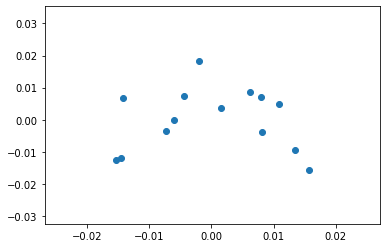

In [0]:
import matplotlib.pyplot as plt
plt.scatter(result[:, 0], result[:, 1])

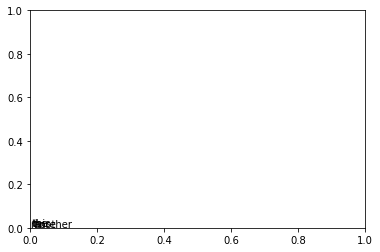

In [0]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


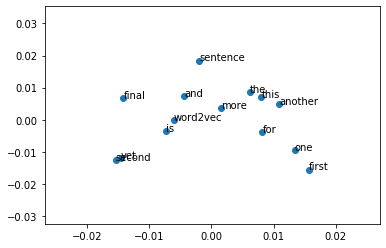

In [0]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()